In [3]:
%tensorflow_version 1.x

import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd 
import io
import seaborn as sns
import sklearn

from google.colab import files
uploaded = files.upload()

data_set=pd.read_csv(io.StringIO(uploaded['social_network_ads.csv'].decode('utf-8')))

# label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_set.Gender=le.fit_transform(data_set.Gender)
data_set.Gender.head()

x=data_set.drop(['Purchased','User ID',],axis='columns')
y=data_set['Purchased']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x.drop('Gender',axis=1,inplace=True)
x=scaler.fit_transform(x)

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=7) 

from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

#Predicting the test set result  
y_pred= classifier.predict(x_test)  

Saving social_network_ads.csv to social_network_ads (1).csv


No handles with labels found to put in legend.


[0.8, 0.8125, 0.9125, 0.9125, 0.925, 0.925, 0.925, 0.925, 0.925, 0.9375, 0.9375, 0.95, 0.95, 0.95, 0.95]


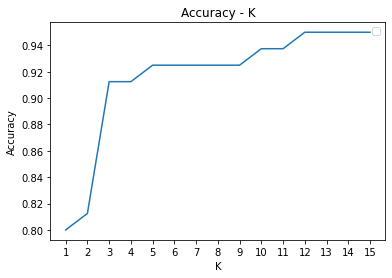

In [4]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
#Predicting the test set result  
results=[]
ks=[]
for i in range(1,16):
  classifier= KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2 )  
  classifier.fit(x_train, y_train)
  y_pred= classifier.predict(x_test)  
  results.append(accuracy_score(y_test,y_pred))
  ks.append(i)

results.sort()
print(results) 
mtp.plot(ks, results)
mtp.title('Accuracy - K')
mtp.xlabel('K')
mtp.ylabel('Accuracy')
mtp.xticks(ks)
mtp.legend()
mtp.show()